In [2]:
import numpy as np
import pandas as pd

from numpy.random import rand as rand
from numpy.random import seed as seed
import matplotlib.pyplot as plt
from IPython.display import clear_output


import linear_regression as LR
import sys

sys.path.append('..')
from misc.utils import MyUtils

# Setup: load datasets

In [3]:
df_X_train = pd.read_csv('houseprice/x_train.csv', header=None)
df_y_train = pd.read_csv('houseprice/y_train.csv', header=None)
df_X_test = pd.read_csv('houseprice/x_test.csv', header=None)
df_y_test = pd.read_csv('houseprice/y_test.csv', header=None)

X_train = df_X_train.to_numpy()
X_test = df_X_test.to_numpy()
n_train = X_train.shape[0]

X_all = MyUtils.normalize_0_1(np.concatenate((X_train, X_test), axis=0))
X_train = X_all[:n_train]
X_test = X_all[n_train:]

y_train = df_y_train.to_numpy()
y_test = df_y_test.to_numpy()


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 13)
(404, 1)
(102, 13)
(102, 1)


In [4]:
z_r = 3

# CLOSED FORM HP Tests

In [5]:
# CLOSED FORM ETA TEST

trainedMSE = []
testMSE = []
etaValues = []
for i in range(0,3,1):
    lr = LR.LinearRegression()
    lr.fit(X_train, y_train, CF = True, lam = 0.1, eta = (0.00125*(2**i)), epochs = 100, degree = z_r)
    trainedMSE.append(lr.error(X_train,y_train))
    testMSE.append(lr.error(X_test, y_test))
    etaValues.append(0.00125/(2**i))
for i in range(1,6,1):
    lr = LR.LinearRegression()
    lr.fit(X_train, y_train, CF = True, lam = 0.1, eta = (0.01*i), epochs = 100, degree = z_r)
    trainedMSE.append(lr.error(X_train,y_train))
    testMSE.append(lr.error(X_test, y_test))
    etaValues.append(0.01*i)

print(etaValues)

[0.00125, 0.000625, 0.0003125, 0.01, 0.02, 0.03, 0.04, 0.05]


Text(0.5, 1.0, 'Adjusting ETA in Closed Form:')

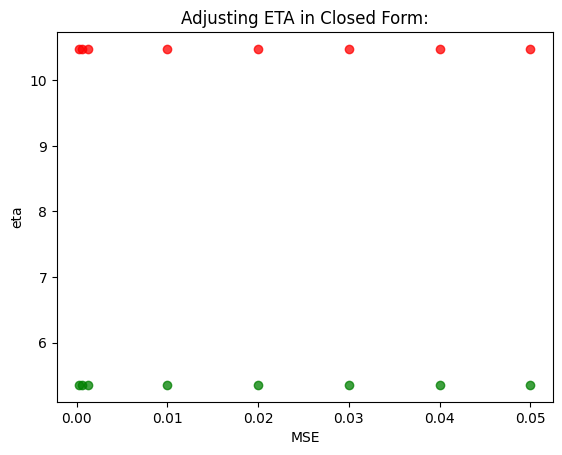

In [6]:
# CLOSED FORM ETA TEST

maxTrain = max(trainedMSE)
maxTest = max(testMSE)
maxY = max(maxTrain,maxTest) 
# print(maxY)
plt.scatter(etaValues,trainedMSE,c="green",alpha=0.75)
plt.scatter(etaValues,testMSE,c="red",alpha=0.75)
plt.xlabel('MSE')
plt.ylabel('eta')
plt.title("Adjusting ETA in Closed Form:")


# show what happens with eta of 7

In [7]:
# CLOSED FORM ETA TEST w/ OUTLIER

trainedMSE = []
testMSE = []
etaValues = []
for i in range(0,3,1):
    lr = LR.LinearRegression()
    lr.fit(X_train, y_train, CF = True, lam = 0.1, eta = (0.00125/(2**i)), epochs = 100, degree = z_r)
    trainedMSE.append(lr.error(X_train,y_train))
    testMSE.append(lr.error(X_test, y_test))
    etaValues.append(0.00125/(2**i))
for i in range(1,7,1):
    lr = LR.LinearRegression()
    lr.fit(X_train, y_train, CF = True, lam = 0.1, eta = (0.01*i), epochs = 100, degree = z_r)
    trainedMSE.append(lr.error(X_train,y_train))
    testMSE.append(lr.error(X_test, y_test))
    etaValues.append(0.01*i)

print(etaValues)

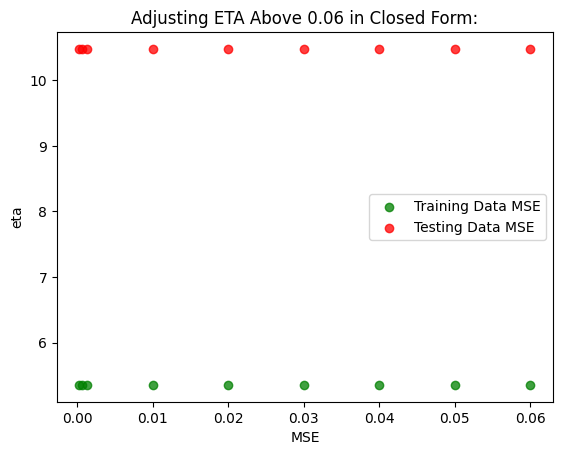

In [ ]:
# CLOSED FORM ETA TEST w/ OUTLIER

maxTrain = max(trainedMSE)
maxTest = max(testMSE)
maxY = max(maxTrain,maxTest) 
# print(maxY)
plt.scatter(etaValues,trainedMSE,c="green",alpha=0.75,label="Training Data MSE")
plt.scatter(etaValues,testMSE,c="red",alpha=0.75,label="Testing Data MSE")
plt.xlabel('MSE')
plt.ylabel('eta')
plt.title("Adjusting ETA Above 0.06 in Closed Form:")
plt.legend()

CF Lam, degree 3 (logarithmic)

In [ ]:
# CLOSED FORM LAM TEST

trainedMSE = []
testMSE = []
lamValues = []
lamIncrement = 0.003125
for i in range(1,22,1):
    lr = LR.LinearRegression()
    lr.fit(X_train, y_train, CF = False, lam = lamIncrement, eta = 0.01, epochs = 1000, degree = z_r)
    trainedMSE.append(lr.error(X_train,y_train))
    testMSE.append(lr.error(X_test, y_test))
    lamIncrement *= 2
    lamValues.append(lamIncrement)

print(lamValues)

[0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4, 204.8, 409.6, 819.2, 1638.4, 3276.8, 6553.6]


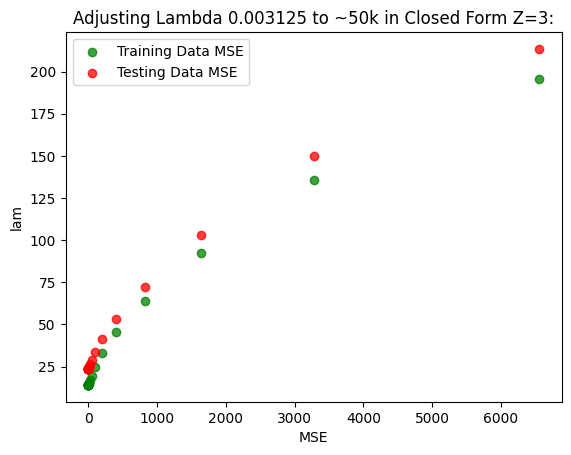

In [ ]:
# CLOSED FORM ETA TEST w/ OUTLIER

maxTrain = max(trainedMSE)
maxTest = max(testMSE)
maxY = max(maxTrain,maxTest) 
# print(maxY)
plt.scatter(lamValues,trainedMSE,c="green",alpha=0.75,label="Training Data MSE")
plt.scatter(lamValues,testMSE,c="red",alpha=0.75,label="Testing Data MSE")

plt.xlabel('MSE')
plt.ylabel('lam')
plt.title("Adjusting Lambda 0.003125 to ~50k in Closed Form Z=3:")
plt.legend()

In [ ]:
# CLOSED FORM DEGREE AND LAM TEST

trainedMSE = []
testMSE = []
lamValues = []

for z in range(1,5):
    lamIncrement = 0.003125
    for i in range(1,21,2):
        lr = LR.LinearRegression()
        lr.fit(X_train, y_train, CF = False, lam = lamIncrement, eta = 0.01, epochs = 500, degree = z)
        trainedMSE.append(lr.error(X_train,y_train))
        testMSE.append(lr.error(X_test, y_test))
        lamIncrement *= 2
        lamValues.append(lamIncrement)

print(lamValues)

[0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 0.00625, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2]


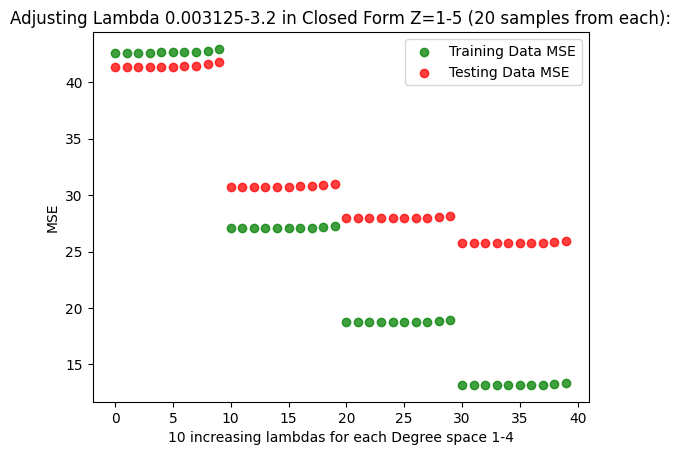

In [ ]:
# CLOSED FORM DEGREE AND LAM TEST

maxTrain = max(trainedMSE)
maxTest = max(testMSE)
maxValue = max(maxTrain,maxTest) 
# print(len(trainedMSE))
# print(maxY)
plt.scatter(range(0,len(trainedMSE)),trainedMSE,c="green",alpha=0.75,label="Training Data MSE")
plt.scatter(range(0,len(trainedMSE)),testMSE,c="red",alpha=0.75,label="Testing Data MSE")

plt.xlabel('10 increasing lambdas for each Degree space 1-4')
plt.ylabel('MSE')
plt.title("Adjusting Lambda 0.003125-3.2 in Closed Form Z=1-5 (20 samples from each):")
plt.legend()

CF lam, degree 1-4

In [ ]:

trainedMSE = []
testMSE = []
lamValues = []

for z in range(1,5):
    lamIncrement = 0.00625
    for i in range(1,21,2):
        lr = LR.LinearRegression()
        lr.fit(X_train, y_train, CF = True, lam = lamIncrement, eta = 0.01, epochs = 500, degree = z)
        trainedMSE.append(lr.error(X_train,y_train))
        testMSE.append(lr.error(X_test, y_test))
        lamValues.append(lamIncrement)
        lamIncrement *= 2
        

print(lamValues)

[0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4]


In [ ]:

avgDifPerDegreeSpace = [] # avg of MSEs for a given degree space
# difs = [] # avg difference of MSEs
MSE_Differences = [] # 

for i in range(0,4):
    avgInTrained = sum(trainedMSE[10*i:10*i+10])/10
    avgInTest = sum(testMSE[10*i:10*i+10])/10
    # print(avgInTrained, avgInTest)
    
    # difs.extend([avgInTest-avgInTrained]*10) 
    avgDifPerDegreeSpace.extend([(avgInTrained+avgInTest)/2]*10)
# print(avgDifPerDegreeSpace)
# print(f"\n\n{difs}")
for i in range(0,40):
    dif = (trainedMSE[i]-testMSE[i])
    difFromZSpaceAvg = avgDifPerDegreeSpace[i%10]+dif
    MSE_Differences.append(difFromZSpaceAvg)



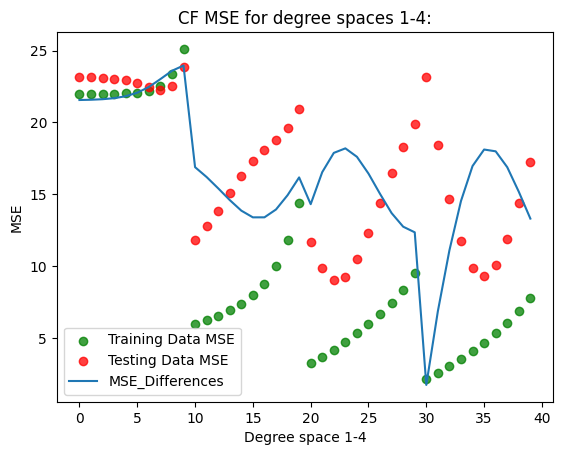

In [ ]:
plt.scatter(range(0,len(trainedMSE)),trainedMSE,c="green",alpha=0.75,label="Training Data MSE")
plt.scatter(range(0,len(trainedMSE)),testMSE,c="red",alpha=0.75,label="Testing Data MSE")
plt.plot(MSE_Differences, label="MSE_Differences")

plt.xlabel('Degree space 1-4')
plt.ylabel('MSE')
plt.title("CF MSE for degree spaces 1-4:")
plt.legend()

# GRADIENT DESCENT HP tests

GD degree only

In [ ]:

# Gradient Descent JUST DEGREE

trainedMSE = []
testMSE = []
degreeSpace = []

for z in range(1,5):
    # for i in range(1,21,2):
    lr = LR.LinearRegression()
    lr.fit(X_train, y_train, CF = True, lam = 0.1, eta = 0.01, epochs = 1000, degree = z_r)
    trainedMSE.append(lr.error(X_train,y_train))
    testMSE.append(lr.error(X_test, y_test))
    # lamIncrement *= 2
    degreeSpace.append(z)




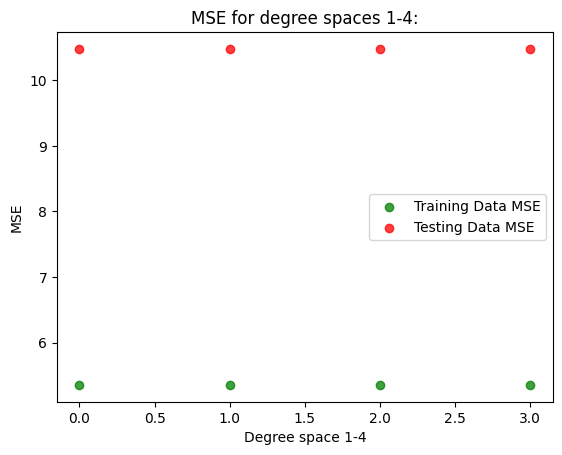

In [ ]:
# GRADIENT DESCENT DEGREE 1-4 TEST

plt.scatter(range(0,len(trainedMSE)),trainedMSE,c="green",alpha=0.75,label="Training Data MSE")
plt.scatter(range(0,len(trainedMSE)),testMSE,c="red",alpha=0.75,label="Testing Data MSE")


plt.xlabel('Degree space 1-4')
plt.ylabel('MSE')
plt.title("MSE for degree spaces 1-4:")
plt.legend()

GD lam, degree 1-4

In [ ]:

# Gradient Descent lam and DEGREE

trainedMSE = []
testMSE = []
lamValues = []

for z in range(1,5):
    lamIncrement = 0.00625
    for i in range(1,21,2):
        lr = LR.LinearRegression()
        lr.fit(X_train, y_train, CF = False, lam = lamIncrement, eta = 0.01, epochs = 700, degree = z)
        trainedMSE.append(lr.error(X_train,y_train))
        testMSE.append(lr.error(X_test, y_test))
        lamValues.append(lamIncrement)
        lamIncrement *= 2
        

# print(lamValues)

NameError: name 'LR' is not defined

In [ ]:

avgDifPerDegreeSpace = [] # avg of MSEs for a given degree space
# difs = [] # avg difference of MSEs
MSE_Differences = [] # 

for i in range(0,4):
    avgInTrained = sum(trainedMSE[10*i:10*i+10])/10
    avgInTest = sum(testMSE[10*i:10*i+10])/10
    # print(avgInTrained, avgInTest)
    
    # difs.extend([avgInTest-avgInTrained]*10) 
    avgDifPerDegreeSpace.extend([(avgInTrained+avgInTest)/2]*10)
# print(avgDifPerDegreeSpace)
# print(f"\n\n{difs}")
for i in range(0,40):
    dif = (trainedMSE[i]-testMSE[i])
    difFromZSpaceAvg = avgDifPerDegreeSpace[i%10]+dif
    MSE_Differences.append(difFromZSpaceAvg)



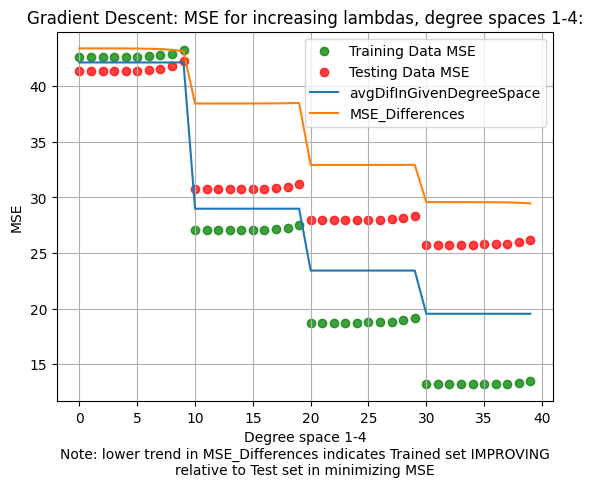

In [ ]:
# GRADIENT DESCENT DEGREE 1-4 TEST

plt.title("Gradient Descent: MSE for increasing lambdas, degree spaces 1-4:")

plt.xlabel('Degree space 1-4\nNote: lower trend in MSE_Differences indicates Trained set IMPROVING\nrelative to Test set in minimizing MSE')
plt.ylabel('MSE')

plt.scatter(range(0,len(trainedMSE)),trainedMSE,c="green",alpha=0.75,label="Training Data MSE")
plt.scatter(range(0,len(trainedMSE)),testMSE,c="red",alpha=0.75, label="Testing Data MSE")

plt.plot(MSE_Differences, label="MSE_Differences")
plt.plot(avgDifPerDegreeSpace, label="avgDifInGivenDegreeSpace")

plt.legend()
plt.grid(True)

In [ ]:
# GD eta testing through degree spaces

trainedMSE = []
testMSE = []
etaValues = []

for z in range(1,5):
    etaTracker = 0.005
    for i in range(1,5,1):
        
        lr = LR.LinearRegression()
        lr.fit(X_train, y_train, CF = False, lam = 0.1, eta = etaTracker, epochs = 200, degree = z)
        trainedMSE.append(lr.error(X_train,y_train))
        testMSE.append(lr.error(X_test, y_test))
        etaValues.append(etaTracker)
        etaTracker *= 2

print(etaValues)

[0.005, 0.01, 0.02, 0.04, 0.005, 0.01, 0.02, 0.04, 0.005, 0.01, 0.02, 0.04, 0.005, 0.01, 0.02, 0.04]


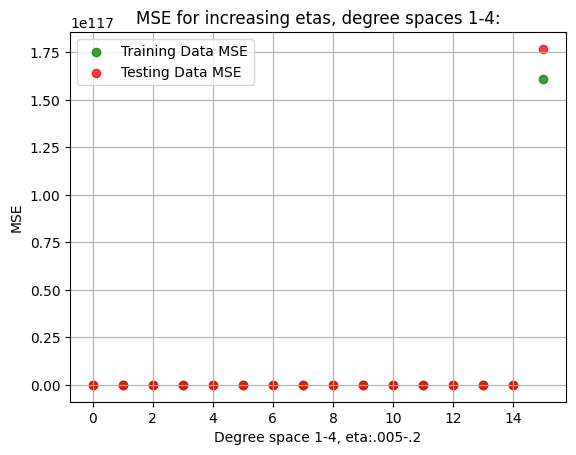

In [ ]:
plt.scatter(range(0,len(trainedMSE)),trainedMSE,c="green",alpha=0.75,label="Training Data MSE")
plt.scatter(range(0,len(trainedMSE)),testMSE,c="red",alpha=0.75, label="Testing Data MSE")
# plt.plot(MSE_Differences, label="MSE_Differences")
# plt.text(0,0,"lower trend in MSE_Differences indicates Trained set improving relative to Test set in minimizing MSE")
plt.xlabel('Degree space 1-4, eta:.005-.2')
        #    Note: lower trend in MSE_Differences indicates Trained set IMPROVING\nrelative to Test set in minimizing MSE')
plt.ylabel('MSE')
plt.title("MSE for increasing etas, degree spaces 1-4:")
plt.legend()
plt.grid(True)